In [1]:
import pandas as pd 
import numpy as np
from bidi.algorithm import get_display
from arabic_reshaper import reshape
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima.utils import ndiffs
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot# رسم شکل
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV
np.set_printoptions(threshold=10000000000000000000)
pd.set_option('display.width',100000)
pd.set_option('display.max_rows',100000)
pd.set_option('display.max_columns',100000)
import warnings
warnings.filterwarnings('ignore')

In [2]:
X=pd.read_excel("D1.xlsx")
# X=pd.read_excel("D2.xlsx")

In [3]:
# X

In [4]:
# X.info()

In [5]:
# X.describe()

In [6]:
X.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [7]:
X_Price=X['Price']

In [8]:
X_Price

0        671.1
1        670.4
2        676.3
3        660.7
4        664.2
5        657.3
6        661.2
7        670.6
8        646.7
9        647.1
10       651.8
11       662.8
12       635.3
13       672.7
14       663.7
15       675.2
16       661.6
17       698.1
18       674.6
19       670.0
20       636.5
21       644.9
22       644.7
23       625.4
24       663.5
25       656.9
26       620.8
27       590.6
28       667.4
29       734.0
30       761.0
31       753.8
32       743.9
33       761.2
34       690.8
35       685.1
36       700.1
37       666.5
38       591.6
39       577.9
40       574.7
41       580.5
42       575.6
43       583.6
44       574.9
45       572.0
46       567.0
47       537.1
48       537.4
49       528.9
50       532.3
51       516.0
52       524.2
53       474.0
54       453.3
55       449.8
56       446.1
57       443.7
58       439.6
59       443.6
60       442.1
61       442.7
62       454.2
63       453.3
64       454.9
65       458.1
66       4

In [9]:
X_DATA=X['Date']

In [10]:
X_DATA

0      2016-07-19
1      2016-07-18
2      2016-07-17
3      2016-07-16
4      2016-07-15
5      2016-07-14
6      2016-07-13
7      2016-07-12
8      2016-07-11
9      2016-07-10
10     2016-07-09
11     2016-07-08
12     2016-07-07
13     2016-07-06
14     2016-07-05
15     2016-07-04
16     2016-07-03
17     2016-07-02
18     2016-07-01
19     2016-06-30
20     2016-06-29
21     2016-06-28
22     2016-06-27
23     2016-06-26
24     2016-06-25
25     2016-06-24
26     2016-06-23
27     2016-06-22
28     2016-06-21
29     2016-06-20
30     2016-06-19
31     2016-06-18
32     2016-06-17
33     2016-06-16
34     2016-06-15
35     2016-06-14
36     2016-06-13
37     2016-06-12
38     2016-06-11
39     2016-06-10
40     2016-06-09
41     2016-06-08
42     2016-06-07
43     2016-06-06
44     2016-06-05
45     2016-06-04
46     2016-06-03
47     2016-06-02
48     2016-06-01
49     2016-05-31
50     2016-05-30
51     2016-05-29
52     2016-05-28
53     2016-05-27
54     2016-05-26
55     201

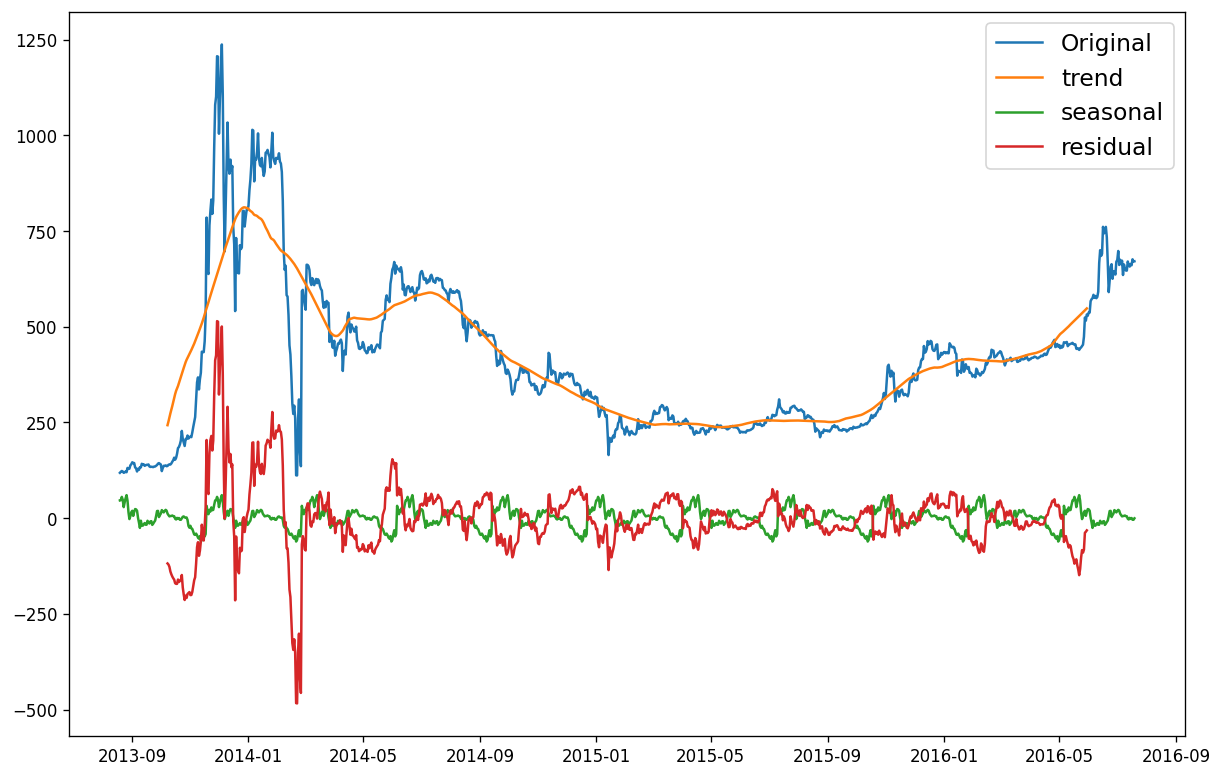

In [11]:
decomposition = seasonal_decompose(x=X_Price,period=100)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(12, 8))
plt.plot(X_DATA,X_Price,label='Original')
plt.plot(X_DATA,trend,label='trend')
plt.plot(X_DATA,seasonal,label='seasonal')
plt.plot(X_DATA,residual,label='residual')
plt.legend(loc='best',fontsize=14)
plt.show()

In [12]:
# decomposition = seasonal_decompose(x=X_Price,period=100)
# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid
# plt.figure(figsize=(12, 8))
# plt.plot(X_DATA,X_Price)
# plt.title(get_display(reshape('مشاهده شده')),fontsize=20)

In [13]:
# plt.figure(figsize=(12, 8))
# plt.plot(X_DATA,trend)
# plt.title(get_display(reshape('روند')),fontsize=20)

In [14]:
# plt.figure(figsize=(12, 8))
# plt.plot(X_DATA,seasonal)
# plt.title(get_display(reshape('فصلی')),fontsize=20)

In [15]:
# plt.figure(figsize=(12, 8))
# plt.plot(X_DATA,residual)
# plt.title(get_display(reshape('تصادفی')),fontsize=20)

In [16]:
result = adfuller(X_Price)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.076480
p-value: 0.254077


In [17]:
### تعیین d
ndiffs(X_Price, test='adf')

1

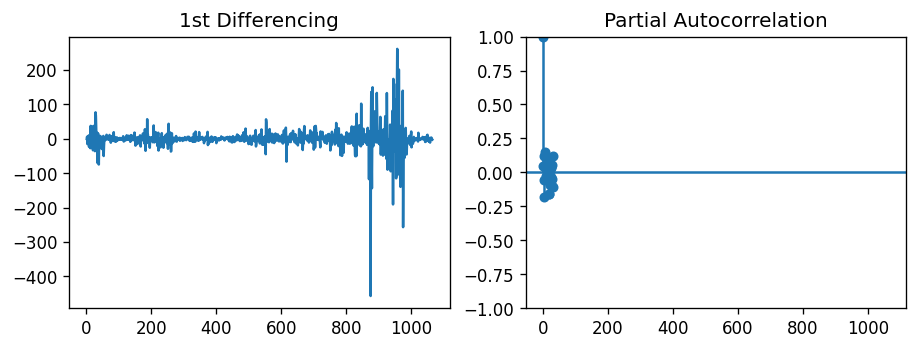

In [18]:
### تعیین p
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(X_Price.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(X_Price.diff().dropna(), ax=axes[1])
plt.show()

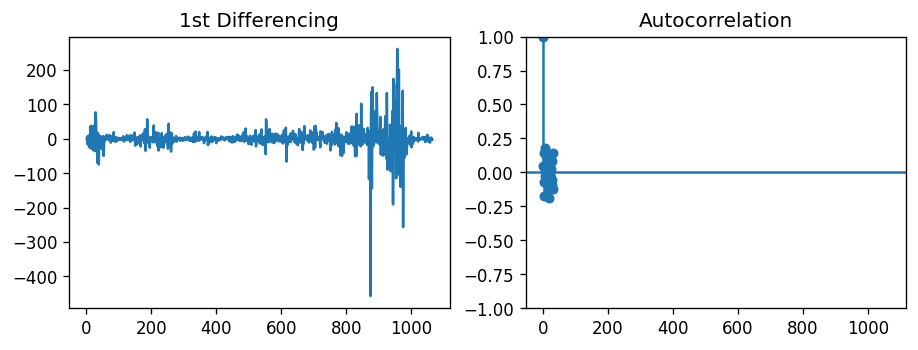

In [19]:
### تعیین q
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(X_Price.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(X_Price.diff().dropna(), ax=axes[1])
plt.show()

In [20]:
X_new=pd.DataFrame(X_Price)

In [21]:
X_new

,Price
0,671.1
1,670.4
2,676.3
3,660.7
4,664.2
5,657.3
6,661.2
7,670.6
8,646.7
9,647.1


In [22]:
X_new['difference']=np.log(X_new).diff()

In [23]:
X_new.isna().sum()

Price         0
difference    1
dtype: int64

In [24]:
X_new.dropna(inplace=True)

In [25]:
X_new=X_new['difference']

In [26]:
X_new

1      -0.001044
2       0.008762
3      -0.023337
4       0.005283
5      -0.010443
6       0.005916
7       0.014116
8      -0.036290
9       0.000618
10      0.007237
11      0.016736
12     -0.042376
13      0.057202
14     -0.013469
15      0.017179
16     -0.020348
17      0.053701
18     -0.034242
19     -0.006842
20     -0.051293
21      0.013111
22     -0.000310
23     -0.030394
24      0.059137
25     -0.009997
26     -0.056523
27     -0.049870
28      0.122251
29      0.095119
30      0.036124
31     -0.009506
32     -0.013220
33      0.022990
34     -0.097046
35     -0.008286
36      0.021658
37     -0.049183
38     -0.119209
39     -0.023430
40     -0.005553
41      0.010042
42     -0.008477
43      0.013803
44     -0.015020
45     -0.005057
46     -0.008780
47     -0.054175
48      0.000558
49     -0.015943
50      0.006408
51     -0.031100
52      0.015767
53     -0.100666
54     -0.044653
55     -0.007751
56     -0.008260
57     -0.005394
58     -0.009283
59      0.0090

In [27]:
X_new.shape

(1065,)

In [28]:
X_train=X_new[:800]
X_test=X_new[800:]

In [29]:
model = sm.tsa.arima.ARIMA(X_train,order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             difference   No. Observations:                  800
Model:                 ARIMA(1, 0, 1)   Log Likelihood                1582.532
Date:                Tue, 16 Aug 2022   AIC                          -3157.064
Time:                        20:50:54   BIC                          -3138.326
Sample:                             0   HQIC                         -3149.866
                                - 800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.001     -0.436      0.663      -0.003       0.002
ar.L1         -0.5730      0.224     -2.554      0.011      -1.013      -0.133
ma.L1          0.6458      0.218      2.958      0.0

In [30]:
yhat=model_fit.predict(start=800,end=1064)

In [31]:
yhat.shape

(265,)

In [32]:
Y_real_test=X_test

In [33]:
Y_real_test.shape

(265,)

In [34]:
np.sqrt(mean_squared_error(Y_real_test,yhat))

0.1438708805491473

In [35]:
mean_squared_error(Y_real_test,yhat)

0.020698830269987006

In [36]:
mean_absolute_error(Y_real_test,yhat)

0.06282485006633744